In [13]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sys, os

root = os.path.dirname(os.getcwd())
sys.path.insert(0, root)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:

history = np.load(os.path.join(root, "results", "ga_1.npy"), allow_pickle=True)


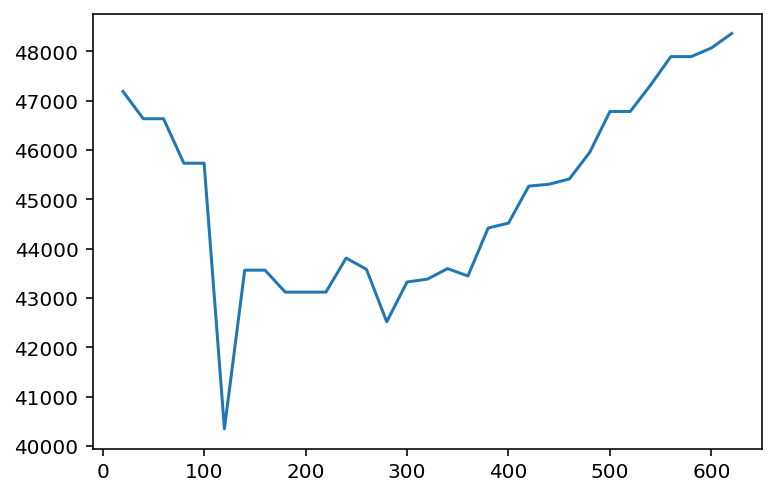

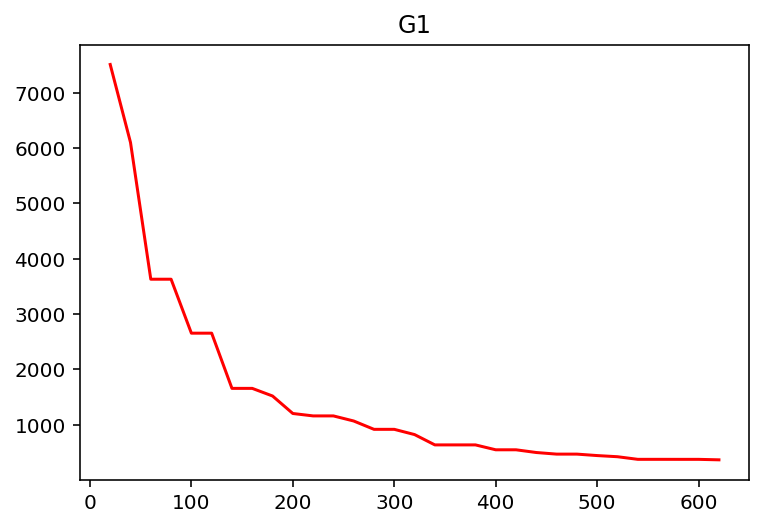

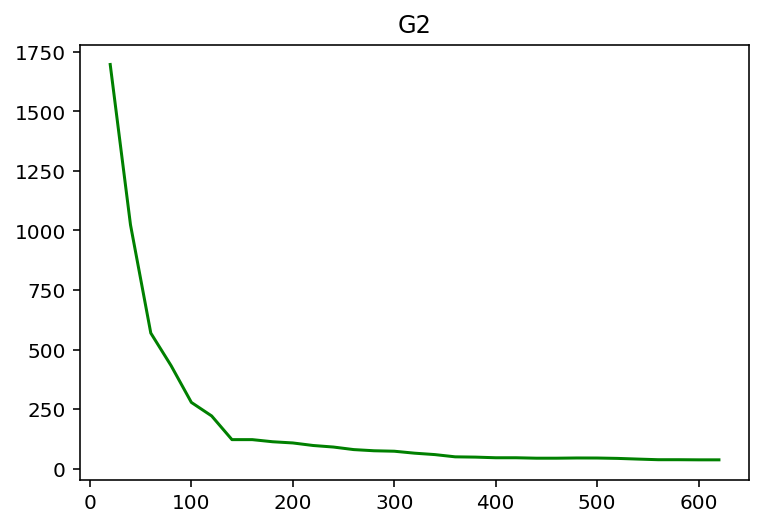

In [20]:

evals = []
F = []
G1 = []
G2 = []

for algorithm in history:
    

    F.append(algorithm.pop.get("F").min())
    G1.append(algorithm.pop.get("G")[:, 0].min())
    G2.append(algorithm.pop.get("G")[:, 1].min())
    
    evals.append(algorithm.evaluator.n_eval)
    

plt.plot(evals, F, label="F")
plt.show()

plt.title("G1")
plt.plot(evals, G1, color="red")
plt.show()

plt.title("G2")
plt.plot(evals, G2, color="green")
plt.show()


    